# 9. 인물사진을 만들어 보자

## 프로젝트: 인물 모드 문제점 찾기

#### 라이브러리 버전확인

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


In [2]:
import os 
import urllib             # 웹에서 데이터 다운로드할때 사용
import cv2                # OpenCV라이브러리 이미지를 처리하기 위해 필요 
import numpy as np
from pixellib.semantic import semantic_segmentation      # 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt


### Step 1. 인물모드 직접 해 보기

최소 3장의 인물모드 사진

시맨틱 세그멘테이션 스탭

블러인물모드 사진이 아니라  배경교체하는 크로마키 배경합성시도

#### 인물사진 모드

(720, 1280, 3)


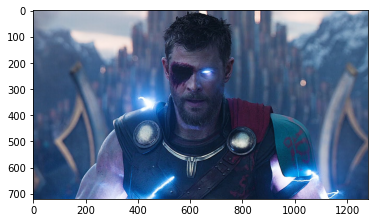

In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/thor.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb5ab396d90>)

In [5]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [7]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

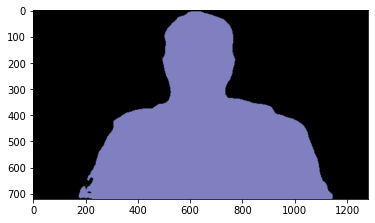

In [8]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(720, 1280)


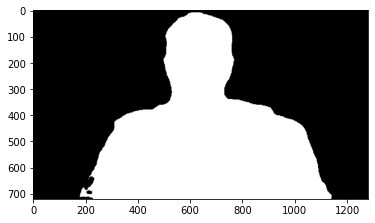

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

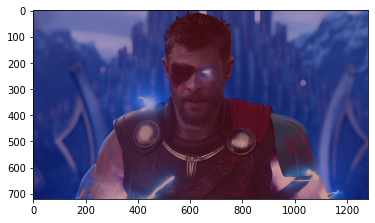

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

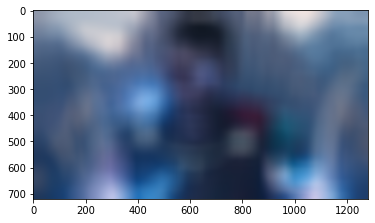

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (100,100))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

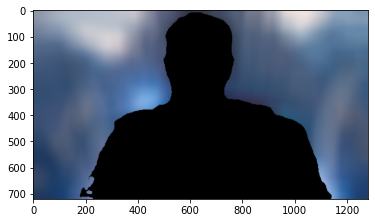

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

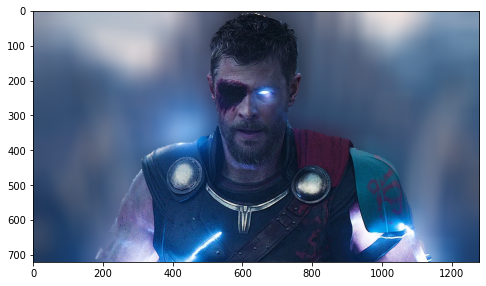

In [17]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
plt.figure(figsize=(8,8))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 동물 

(924, 1280, 3)


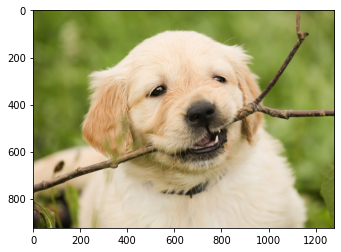

In [18]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb5ab1c2a60>)

In [20]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file) 

In [21]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

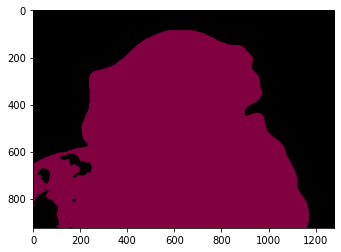

In [22]:
plt.imshow(output)
plt.show()

In [23]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [24]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] 

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [25]:
colormap[12] 

array([ 64,   0, 128])

In [26]:
seg_color = (128,0,64)

(924, 1280)


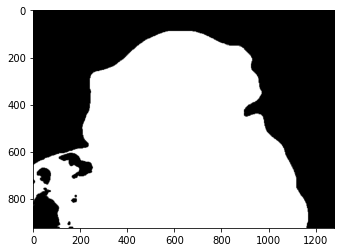

In [27]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

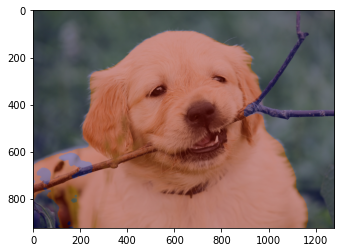

In [28]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

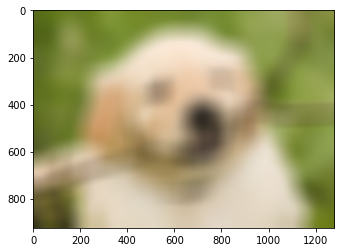

In [29]:
img_orig_blur = cv2.blur(img_orig, (100,100))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

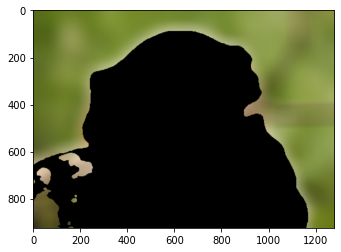

In [30]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

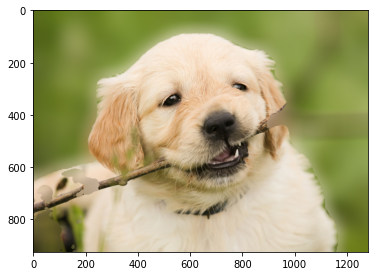

In [31]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

나뭇가지가 완벽하게 보이지 않음

강아지라고 인식해서 나뭇가지부분은 잘린것 같다

다른 모델과 비교해보기위해 이미지를 저장한다

In [32]:
save_file =  os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_image.png'  
cv2.imwrite(save_file,img_concat)
print("이미지 저장완료-")

이미지 저장완료-


#### 배경화면 크로마키

(1800, 2880, 3)


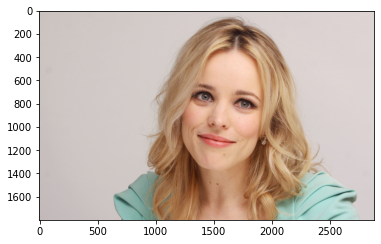

In [33]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/rachel.png' 
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 

model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 


urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb593514bb0>)

In [35]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [36]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

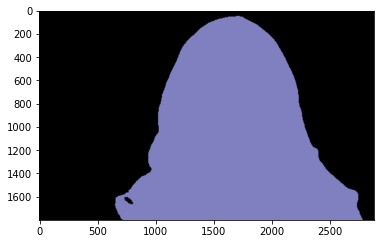

In [37]:
plt.imshow(output)
plt.show()

In [38]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [39]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [40]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [41]:
colormap[15]

array([192, 128, 128])

In [42]:
seg_color = (128,128,192)

(1800, 2880)


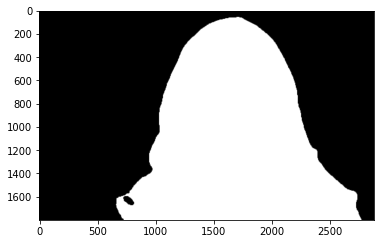

In [43]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

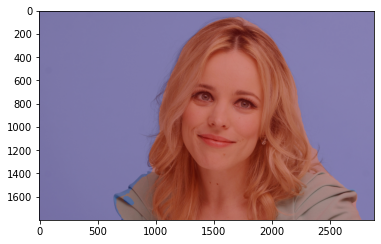

In [44]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

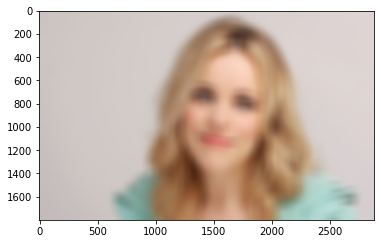

In [45]:
img_orig_blur = cv2.blur(img_orig, (100,100))

plt.show()

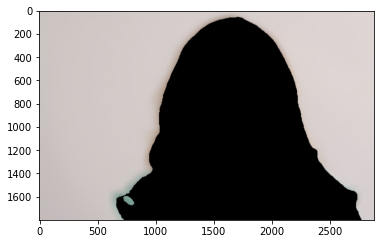

In [46]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

배경이 블러처리되었을때 명확하게 눈에 들어오지 않아서 블러 이미지 대신 mask 값을 넣어서 인물 사진이 잘 만들어졌는지 확인

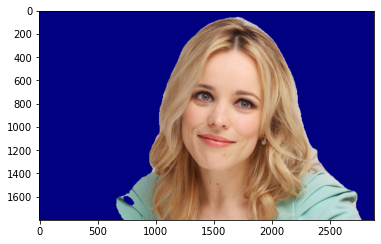

In [47]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, color_mask)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

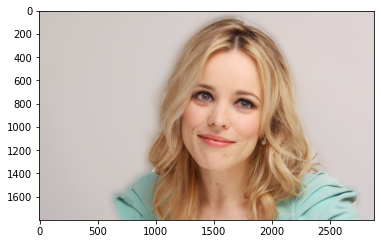

In [48]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 인물사진과 배경이미지 합성해보기

배경으로 할 이미지를 불러온뒤, 

np.where(조건, 참, 거짓) 에서 거짓에 해당하는 부분에 블러이미지 대신 

불러온 배경화면 이미지를 넣으면 되지 않을까 하는 생각으로 적용해보았다


그렇게 하려면 인물사진 크기와 배경이미지가 크기가 서로 같아야하기때문에,

배경이미지나 인물사진의 크기를 resize()해주어 합성이 가능하도록 해주었다



(506, 900, 3)


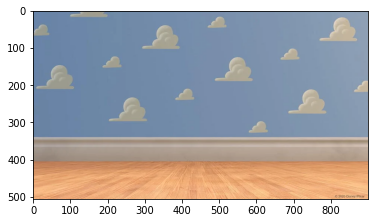

In [49]:
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/disney_background.png'  
bg_orig = cv2.imread(bg_path) 

print(bg_orig.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1800, 2880, 3)


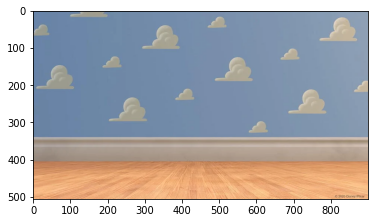

In [50]:
resize_img = cv2.resize(bg_orig,(2880,1800))

print(resize_img.shape)
plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

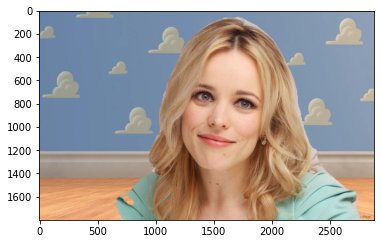

In [51]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, resize_img)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 하나 더 해보기(결혼식 배경화면 바꿔보기)

(500, 800, 3)


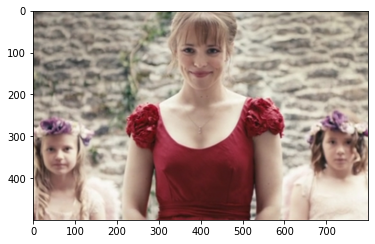

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb594a4edc0>)

In [52]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/abouttime2.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)


plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 


urllib.request.urlretrieve(model_url, model_file) 

In [53]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [54]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

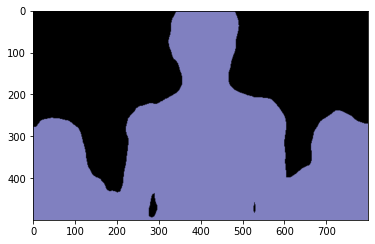

In [55]:
plt.imshow(output)
plt.show()

In [56]:
segvalues 

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [57]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [58]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] 

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [59]:
colormap[15] 

array([192, 128, 128])

In [60]:
seg_color = (128,128,192)

(500, 800)


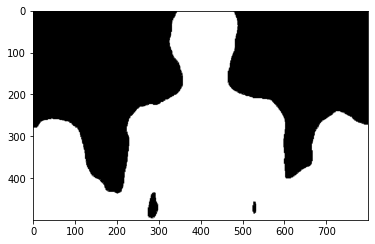

In [61]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

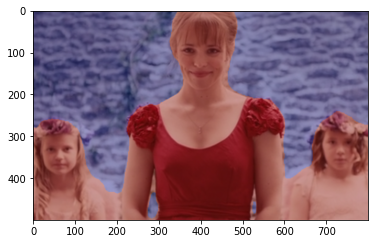

In [62]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

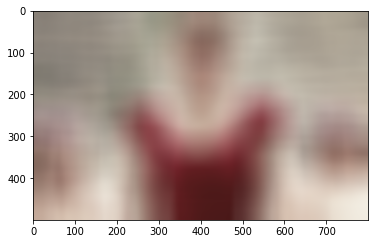

In [63]:
img_orig_blur = cv2.blur(img_orig, (100,100))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

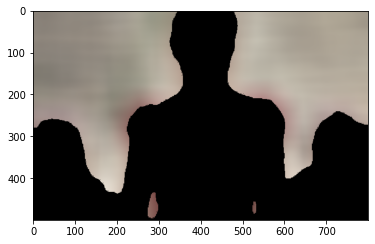

In [64]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

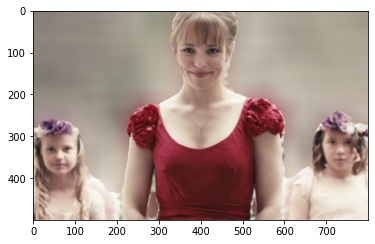

In [65]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(866, 1300, 3)


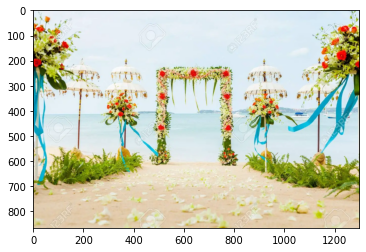

In [66]:
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/wedding.png'  
bg_orig = cv2.imread(bg_path) 

print(bg_orig.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

(866, 1300, 3)
(866, 1300, 3)
(866, 1300, 3)


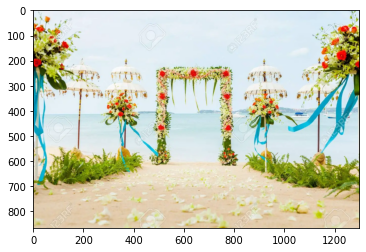

In [67]:
resize_img_origin = cv2.resize(img_orig,(1300,866))
resize_img_mask_color = cv2.resize(img_mask_color,(1300,866))

print(bg_orig.shape)
print(resize_img_origin.shape)
print(resize_img_mask_color.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

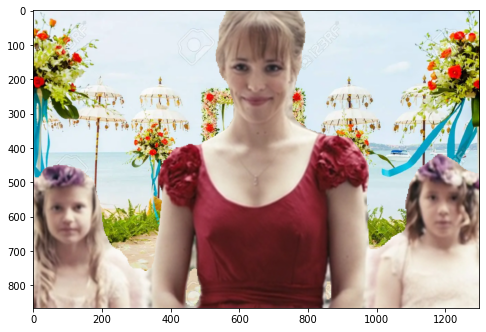

In [68]:
plt.figure(figsize=(8,8))
img_concat = np.where(resize_img_mask_color==255, resize_img_origin, bg_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
save_file =  os.getenv('HOME')+'/aiffel/human_segmentation/images/wedding_image.png'  
cv2.imwrite(save_file,img_concat)
print("이미지 저장완료-")

이미지 저장완료-


감지가 어려울 것 같은 스파이더맨 해보기

(1011, 1920, 3)


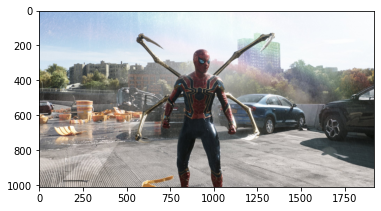

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb591576a00>)

In [70]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/spiderman.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)


plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 


urllib.request.urlretrieve(model_url, model_file) 

In [71]:
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 


In [72]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

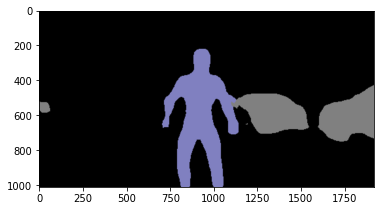

In [73]:
plt.imshow(output)
plt.show()

In [74]:
segvalues 

{'class_ids': array([ 0,  7, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [75]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
person


In [76]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [77]:
colormap[15] 

array([192, 128, 128])

In [78]:
seg_color = (128,128,192)

(1011, 1920)


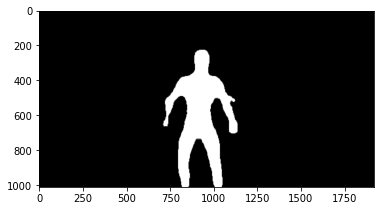

In [79]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

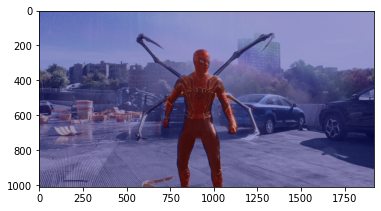

In [80]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

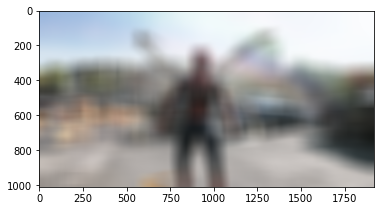

In [81]:
img_orig_blur = cv2.blur(img_orig, (100,100))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

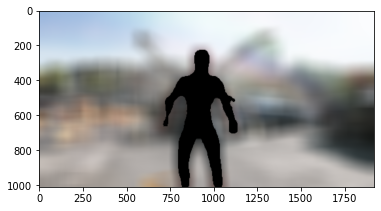

In [82]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

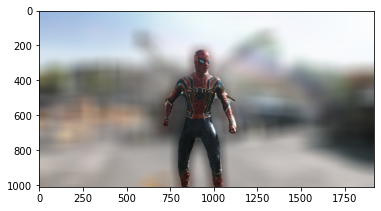

In [83]:
plt.figure(figsize=(6,6))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(506, 900, 3)


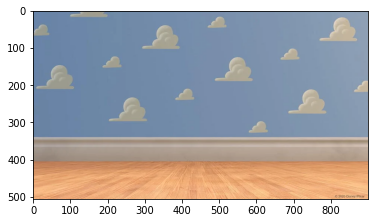

In [84]:
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/disney_background.png'  
bg_orig = cv2.imread(bg_path) 

print(bg_orig.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

(506, 900, 3)


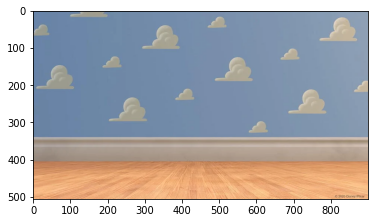

In [85]:
resize_img_bg = cv2.resize(bg_orig,(1920,1011))

print(bg_orig.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

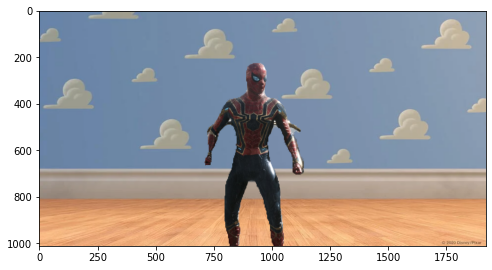

In [86]:
plt.figure(figsize=(8,8))
img_concat = np.where(img_mask_color==255, img_orig, resize_img_bg)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
save_file =  os.getenv('HOME')+'/aiffel/human_segmentation/images/spiderman_image.png'  
cv2.imwrite(save_file,img_concat)
print("이미지 저장완료-")

이미지 저장완료-


### Step 2. 사진에서 문제점 찾기

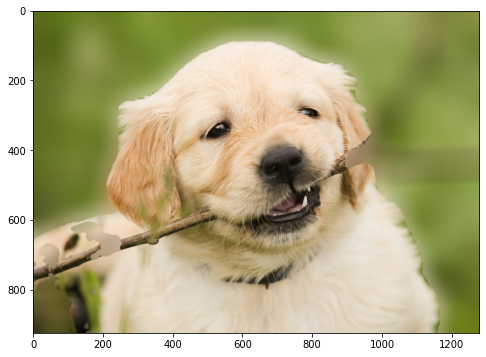

In [88]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_image.png'  
img_orig = cv2.imread(img_path) 

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

꼬리부분을 감지하면서 어떤부분은 감지됐고, 아닌부분도있었다


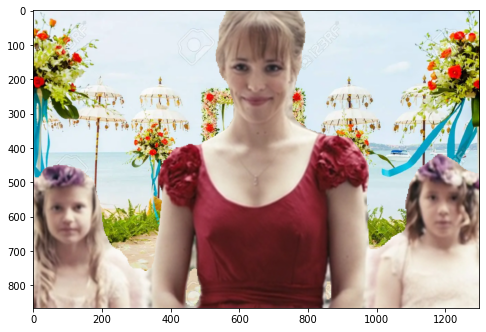

In [89]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/wedding_image.png'  
img_orig = cv2.imread(img_path) 

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

감지가 잘 못된건 아니지만 양 옆의 사람들은 화질을 더 좋게 할 수는 없을까 하는 생각이 들었다

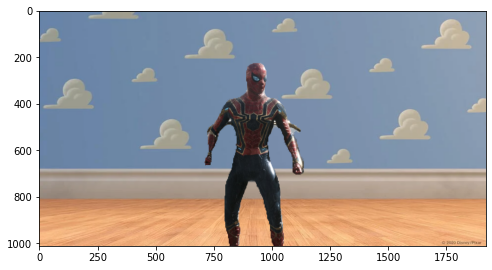

In [90]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/spiderman_image.png'  
img_orig = cv2.imread(img_path) 

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

스파이더맨의 경우,

등에 달린 거미다리(?) 일부분이 같이 사람으로 감지되었다.

### Step 3. 해결 방법을 제안해 보기


###### 워터쉐드 해보기(현재에는 잘 사용하지 않는기술)

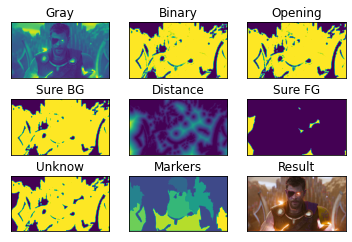

In [91]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/thor.png'  

img = cv2.imread(img_path)

# 이진 이미지로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# 잡음 제거
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 이미지 확장을 통해 확실한 배경 요소 확보
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# distance transform을 적용하면 중심으로 부터 Skeleton Image를 얻을 수 있음.
# 이 결과에 Threshold를 적용하여 확실한 객체 또는 전경 요소를 확보
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# 배경과 전경을 제외한 영역 곳을 확보
unknown = cv2.subtract(sure_bg, sure_fg)

# 마커 생성 작성
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# 앞서 생성한 마커를 이용해 Watershed 알고리즘을 적용
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]
images = [gray,thresh,opening, sure_bg, dist_transform, sure_fg, unknown, markers, img]
titles = ['Gray', 'Binary', 'Opening', 'Sure BG', 'Distance', 'Sure FG', 'Unknow', 'Markers', 'Result']

for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])


    
plt.show()

###### Instance Segmentation 시도해보기

https://pixellib.readthedocs.io/en/latest/Image_instance.html

In [92]:
import pixellib
from pixellib.instance import instance_segmentation
import os 
import urllib             # 웹에서 데이터 다운로드할때 사용
import cv2                # OpenCV라이브러리 이미지를 처리하기 위해 필요 
import numpy as np
from pixellib.semantic import semantic_segmentation      # 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt


path_img = os.getenv('HOME')+'/aiffel/human_segmentation/images/oxfordstreet.png'
path_orig = cv2.imread(path_img)


model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5' 

urllib.request.urlretrieve(model_url, model_file)


('/aiffel/aiffel/human_segmentation/models/mask_rcnn_coco.h5',
 <http.client.HTTPMessage at 0x7fb5927d4ac0>)

In [93]:
segment_image = instance_segmentation(infer_speed = "fast")   

# 기본적으로 감지속도는 단일 이미지를 처리하는데 약1초가 걸린다고한다

# infer_speed = "fast"  빠른 감지 모드 추가
# 검출속도는 단일 이미지를 처리하는데 약 0.35초라고한다

segment_image.load_model(model_file) 

Instructions for updating:
Use fn_output_signature instead


In [94]:
segvalues, output = segment_image.segmentImage(path_img,show_bboxes = True)  # 감지된 객체에 경계상자를 사용해 구현

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


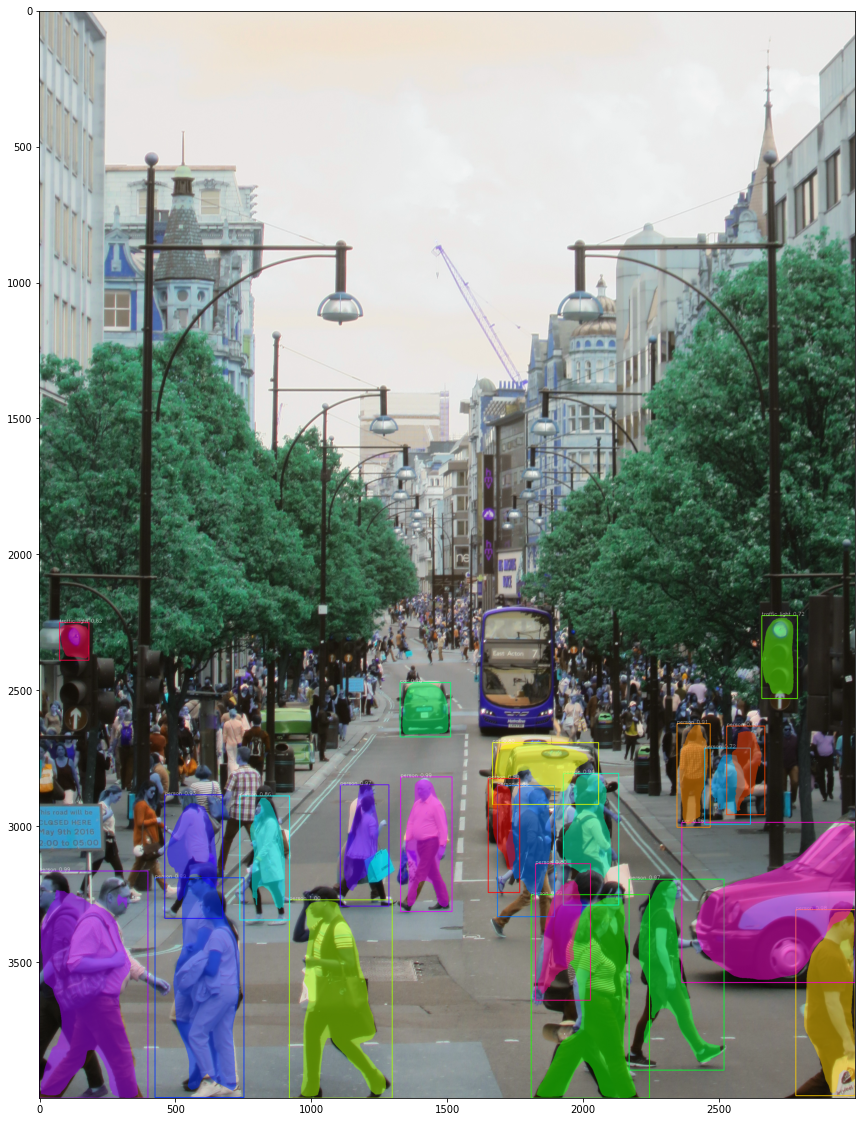

In [95]:
plt.figure(figsize=(20,20))
plt.imshow(output)
plt.show()

희미하게 감지한게 어떤 라벨인지 적혀있다

In [96]:
# segvalues

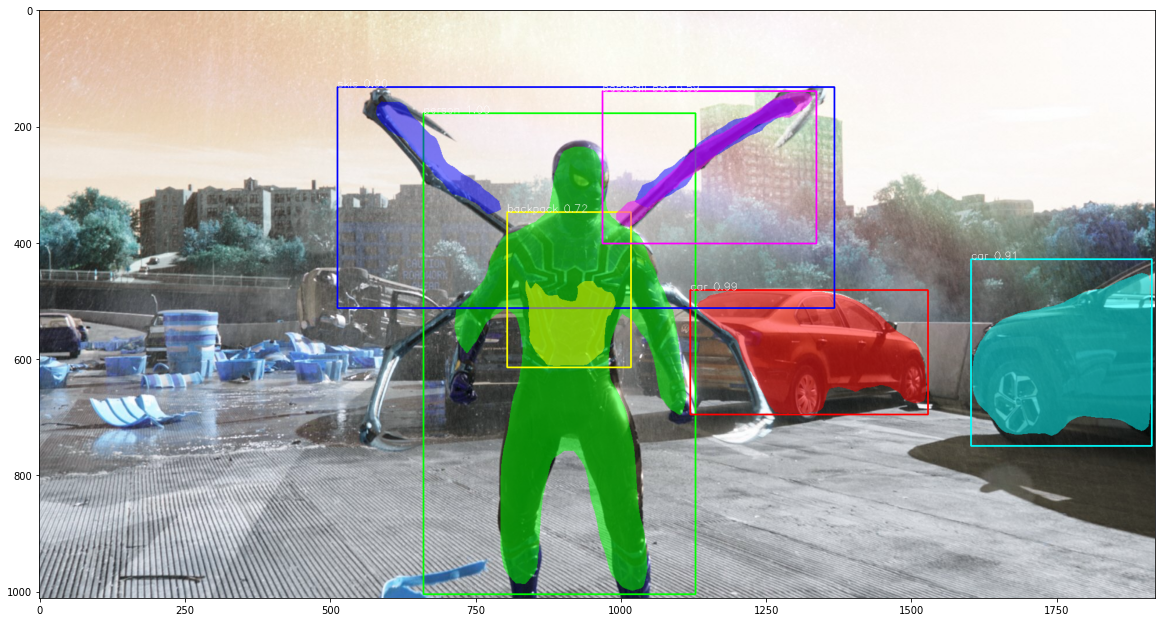

In [97]:

path_img = os.getenv('HOME')+'/aiffel/human_segmentation/images/spiderman.png'
path_orig = cv2.imread(path_img)


model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5' 

urllib.request.urlretrieve(model_url, model_file)


segment_image = instance_segmentation(infer_speed = "fast")   

# 기본적으로 감지속도는 단일 이미지를 처리하는데 약1초가 걸린다고한다

# infer_speed = "fast"  빠른 감지 모드 추가
# 검출속도는 단일 이미지를 처리하는데 약 0.35초라고한다

segment_image.load_model(model_file) 

segvalues, output = segment_image.segmentImage(path_img,show_bboxes = True) 

plt.figure(figsize=(20,20))
plt.imshow(output)
plt.show()

In [98]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.png'  
img_orig = cv2.imread(img_path) 


model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5' 

urllib.request.urlretrieve(model_url, model_file)


segment_image = instance_segmentation(infer_speed = "rapid")   

# 기본적으로 감지속도는 단일 이미지를 처리하는데 약1초가 걸린다고한다

# infer_speed = "rapid"  는 가장 빠른 감지모드이다
# 검출속도는 단일 이미지를 처리하는데 감지 속도가 약 0.25초라고한다

segment_image.load_model(model_file) 

In [99]:
segvalues, output = segment_image.segmentImage(img_path,show_bboxes = True)  # 감지된 객체에 경계상자를 사용해 구현

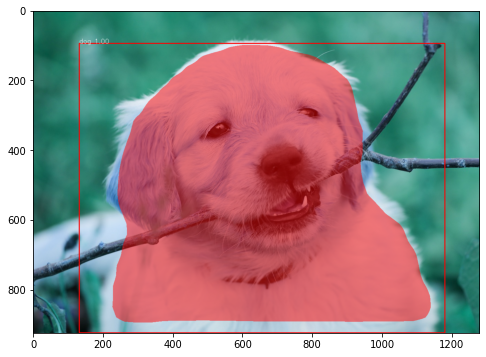

In [100]:
plt.figure(figsize=(8,8))
plt.imshow(output)
plt.show()

box영역에 dog라고 나와있는걸 볼 수 있다

위에서 deeplabv3_xception_tf_dim_ordering_tf_kernels 모델을 사용해서 감지해본결과랑 비교했을때,

영역이 다른것을 알 수 있다.

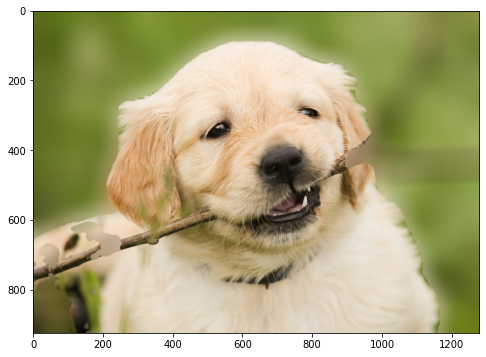

In [101]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_image.png'  
img_orig = cv2.imread(img_path) 

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

두 사진을 비교했을때 

sementic segmentation은 강아지의 꼬리부분까지 감지하여 꼬리쪽 나뭇가지는 감지되었지만, 오른쪽 귀부분의 나뭇가지는 감지되지 않았다

instance segmentation은 강아지의 얼굴과 정면 몸통이있는 부분만 감지하고 꼬리부분은 감지하지 못했다

감지한 영역의 테두리도 다르다

아웃포커싱 : 초점이 맞은 피사체의 배경을 흐릿하게 보이도록 하는 기술
    
아웃포커싱됐다 = 심도가 낮은 사진 이라는 뜻

심도 = 피사계 심도(depth of field, DOF)를 말한다

피사계 심도 : 초점이 맞은것으로 인식되는 범위
    
    렌즈의 초점이 맞은거리 = 초점면(Focus Point) 
    
    초점면을 중심으로 서서히 흐려지는 현상
    
    깊다(Large) ex. 풍경사진처럼 초점이 전체
    
    얕다(Narrow) ex. 아웃포커싱된 사진
    

아웃포커싱 방법

 - 카메라의 이미지 센서가 클수록 (이미지 센서는 카메라가 빛을 받아들이는 면적)
    
    큰 센서가 심도가 얕은 사진(아웃포커싱), 작은 센서 포맷은 피사계 심도가 깊은 사진(팬포커스) 를 찍는데 유리하다
    
 - 망원렌즈를 쓰거나 줌을 했을 때
     
    초점거리는 렌즈의 중심으로부터 초점간의 거리이다
     
    같은 환경에서 렌즈의 초점 거리가 초점거리가 멀어지면 심도는 약해지고 가까워지면 피사계 심도가 깇어진다
     
 - 조리개가 많이 개방될 수록(F 값이 작을수록)
 
   F : 렌즈의 조리개 방향정도를 나타내는 값
   
 - 카메라와 피사체간의 거리가 가까울때
 
   화각은 고정이고 조리개 값도 최소로 나췄는데 아웃포커링이 더 필요할 때 카메라가 피사체에 더 다가가면 효과를 높일 수 있다
   
 - 피사체와 배경과의 거리가 멀수록
 
    배경이 인물에서 멀이질 수록 아웃포커싱이 더 잘된다
     
     
    카메라 내에서 가장 간단히 아웃포커싱 할 수 있는 방법은 F값을 낮추는 것 이다.
     
     
[얕은 피사계]
    피사체를 약간 흐리게 만들어서 이미지에 대한 값을 더하고 강한 호기심 유발
    


segmentation = 분할

pixel 수준에서 각 영역이 어떤의미를 갖는지 분리하는 방법

Sementic Segmentation 은 한 이미지 내의 어떤 object도 존재하지 않는다.

'GRASS', 'CAT', 'TREE', 'SKY'라는 4개의 class의 위치를 인식했고 판별하는 접근법

동일한 객체들끼리는 한번에 masking 수행 (FCN이 대표적인 기법)

원본 이미지를 convolution으로 차원을 축소해 원본 이미지의 응집되고 추상화된 특징을 추출한다. 이를 up sampling을 사용해서 다시 복원하며 정보를 학습한다고한다

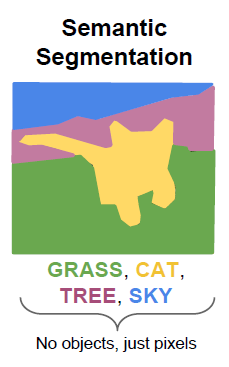

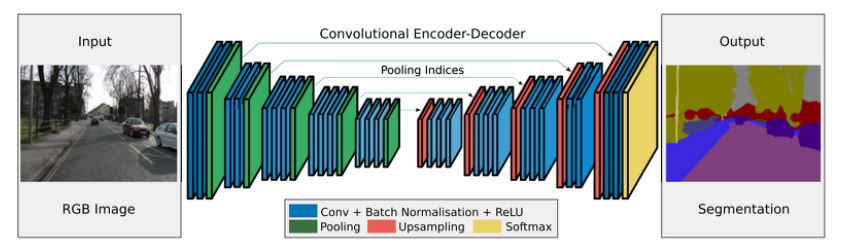

Instance segmentation

sementic segmentation과 비슷하게 생겄지만 multi object

같은 이름이어도 DOG는 같은 object인데도 따로 구분을 해준다.

각 object의 위치를 정확히 식별하는 객체 인식(ojvect detecrtion)

동일한 객체들이여도 개별 object별로 masking 수행 (Mask RCNN)


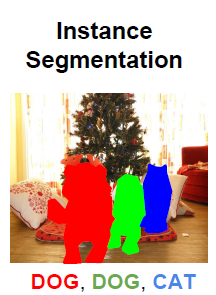

FCN(Fully Convolution Network)

semantic segmentation encoder-decoder model의 종류중 하나.

원본 이미지를 압축하는 encoder과정을 거치는데, 복원하는 decoder 과정에서 
사이즈가 작은 convolution layer에서 한번에 원본 이미지 사이즈와 비슷한 크기의 형태로 up sampling을 수행한다

그러면서 segmentation의 결과가 뚜렷하지 못하고 구분이 애매해지는 문제점이 발생한다

인코더 과정에서 convolution layer를 거치면서 나오는 feature map을 skip connection할 대상으로 사용해

디코더의 원본 이미지 사이즈 크기로 업샘플링 할때 skip connection을 활용한다고한다

그렇게되면 segmentation의 결과가 조금 더 뚜렷하게 나오지 않을까 하고 생각이 든다

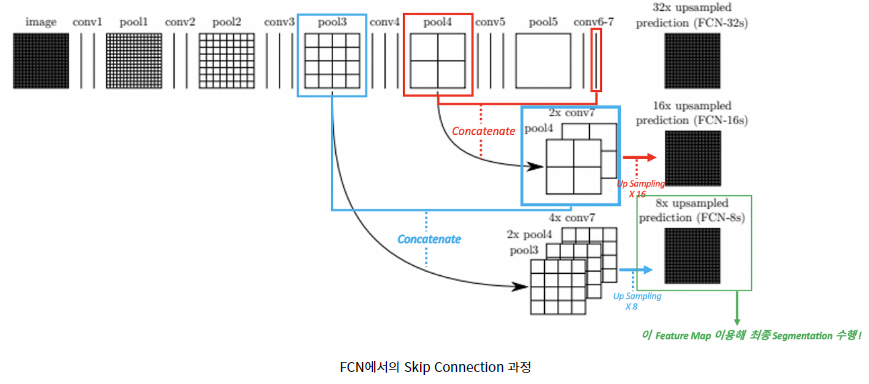

# 회고 

- 이번 프로젝트에서 **어려웠던 점,**

문제점에 대한 솔루션을 찾는게 어려웠다

- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

    instanse segmentation 참고 링크 : https://pixellib.readthedocs.io/en/latest/Image_instance.html
    
    instance semnentation 을 시도해보기위해 다양한 자료를 보고 적용해보았다
    
    semantic segmentation의 문제점을 해결하기위해 FCN 이라는 개념을 알게되었는데,
    
    ResNet에서 처음 사용된 skip connection 이라는 개념이 아직 확실하게 알지못해 그부분을 더 공부해야 할 것 같다
    

- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

문제점을 찾기위해 다양한 사진으로 시도해보았고

문제점의 해결방안을 찾아보면서 워터쉐드기술도 적용해보고 instance segmentation도 시도해보았다

- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.낌

문제점이 잘 드러나는 사진을 해보지 못한 부분

해결방안을 직접 적용해보지 않은 것

- **자기 다짐**

해결방법을 찾아보면서 많은 모델이 있는것을 알게되었는데,

하나씩 공부해보면 좋을거 같다는 생각이들었다.

